In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

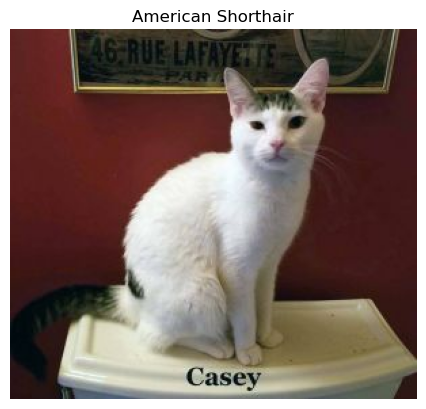

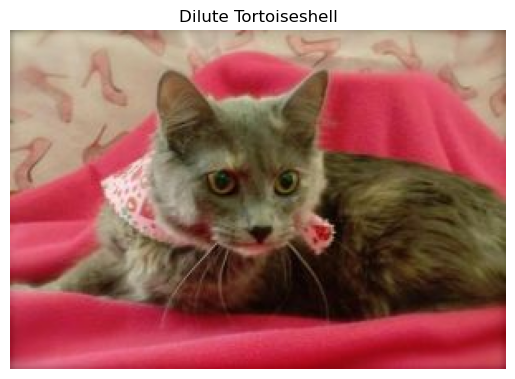

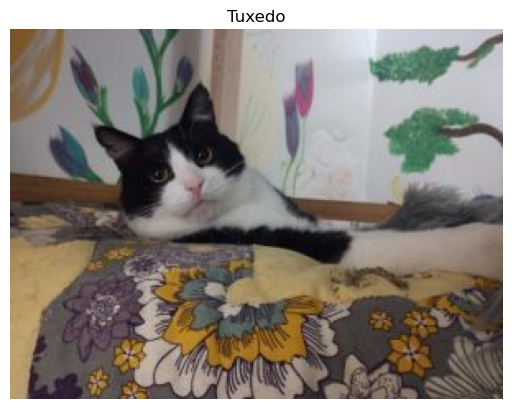

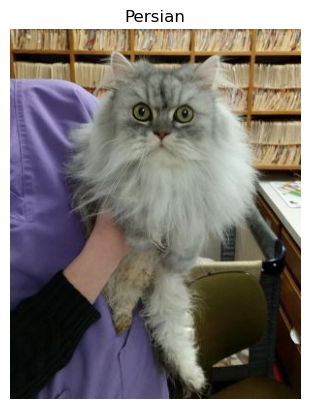

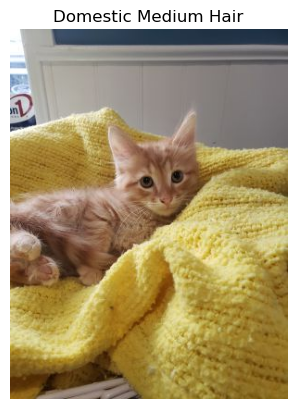

In [2]:
data_dir = '/kaggle/input/catbreed/Capstone'  # Directory path folder

# Get folder list
folders = os.listdir(data_dir)

# Iterate each folder
for folder in folders:
    folder_path = os.path.join(data_dir, folder)  # Path current folder
    images = os.listdir(folder_path)  # Get image list of folder
    
    if len(images) > 0:
        # Get path first image
        image_path = os.path.join(folder_path, images[0])
        
        # Display the image
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(folder)  # Display folder name as title
        plt.axis('off')  # Hide the axis
        plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset path
data_dir = '/kaggle/input/catbreed/Capstone'

# Set training parameter
batch_size = 32
image_size = (224, 224)
input_shape = (224, 224, 3)
num_classes = 5
epochs = 100


In [4]:
# Preprocess and augment the data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [5]:
# load and split val and train
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 12000 images belonging to 5 classes.


In [6]:
valid_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 3000 images belonging to 5 classes.


In [7]:
# Define the callbacks
checkpoint = ModelCheckpoint('/kaggle/working/model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [8]:
# Build the CNN model
num_classes = 5
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# model.summary()


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [10]:

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,279,365
Trainable params: 25,691,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
# Print the details of the data generators
print("Training Generator:")
print("Number of samples:", train_generator.samples)
print("Number of classes:", train_generator.num_classes)
print("Class labels:", train_generator.class_indices)
print()

print("Validation Generator:")
print("Number of samples:", valid_generator.samples)
print("Number of classes:", valid_generator.num_classes)
print("Class labels:", valid_generator.class_indices)

Training Generator:
Number of samples: 12000
Number of classes: 5
Class labels: {'American Shorthair': 0, 'Dilute Tortoiseshell': 1, 'Domestic Medium Hair': 2, 'Persian': 3, 'Tuxedo': 4}

Validation Generator:
Number of samples: 3000
Number of classes: 5
Class labels: {'American Shorthair': 0, 'Dilute Tortoiseshell': 1, 'Domestic Medium Hair': 2, 'Persian': 3, 'Tuxedo': 4}


In [13]:
# Train the model with fine-tuning
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/100
375/375 [==============================] - 1620s 4s/step - loss: 2.0003 - accuracy: 0.1982 - val_loss: 1.6095 - val_accuracy: 0.2009
Epoch 2/100
375/375 [==============================] - 1599s 4s/step - loss: 1.6132 - accuracy: 0.1957 - val_loss: 1.6094 - val_accuracy: 0.2013
Epoch 3/100
375/375 [==============================] - 1608s 4s/step - loss: 1.6185 - accuracy: 0.1962 - val_loss: 1.6094 - val_accuracy: 0.2006
Epoch 4/100
375/375 [==============================] - 1577s 4s/step - loss: 1.6146 - accuracy: 0.1940 - val_loss: 1.6094 - val_accuracy: 0.2006
Epoch 5/100
375/375 [==============================] - 1600s 4s/step - loss: 1.6235 - accuracy: 0.1997 - val_loss: 1.6095 - val_accuracy: 0.1999


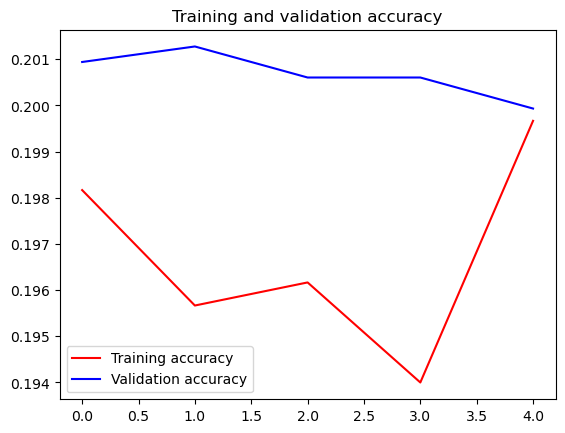

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



plt.show()

In [15]:
import json
from keras.models import model_from_json

# Save the model architecture as JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Save the model weights in HDF5 format
model.save_weights('model_weights.h5')
